In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
data_df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
print(data_df.head())
print(data_df.info())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
for column in data_df.columns:
    print('Total number of nan values for column {} are {}'.format(column, data_df[column].isnull().sum()))

Total number of nan values for column fixed acidity are 0
Total number of nan values for column volatile acidity are 0
Total number of nan values for column citric acid are 0
Total number of nan values for column residual sugar are 0
Total number of nan values for column chlorides are 0
Total number of nan values for column free sulfur dioxide are 0
Total number of nan values for column total sulfur dioxide are 0
Total number of nan values for column density are 0
Total number of nan values for column pH are 0
Total number of nan values for column sulphates are 0
Total number of nan values for column alcohol are 0
Total number of nan values for column quality are 0


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

NameError: name 'plt' is not defined

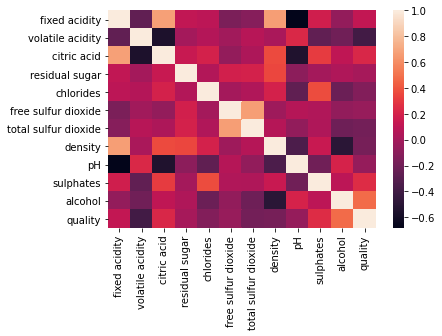

In [4]:
print(data_df.describe())
import seaborn as sns

sns.heatmap(data_df.corr())
plt.show()

In [5]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [6]:
X = data_df.loc[:, data_df.columns != 'quality']
X_train, X_test, y_train, y_test = train_test_split(X, data_df['quality'], test_size=0.2, random_state=101)
print("X train \n{}".format(X_train.head()))
print("X test \n{}".format(X_test.head()))
print("y train \n{}".format(y_train.head()))
print("y test \n{}".format(y_test.head()))

X train 
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1345            8.2              0.44         0.24            2.30      0.063   
179             8.8              0.61         0.14            2.40      0.067   
757             8.1              0.87         0.00            2.20      0.084   
326            11.6              0.53         0.66            3.65      0.121   
1369            6.6              0.61         0.00            1.60      0.069   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1345                 10.0                  28.0  0.99613  3.25       0.53   
179                  10.0                  42.0  0.99690  3.19       0.59   
757                  10.0                  31.0  0.99656  3.25       0.50   
326                   6.0                  14.0  0.99780  3.05       0.74   
1369                  4.0                   8.0  0.99396  3.33       0.37   

      alcohol  
1345     10.2  
179      

In [7]:

from sklearn.metrics import classification_report
#Straight Simple Naive approach
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
for i in range(len(predictions)):
    predictions[i] = int(round(predictions[i]))
print('Predictions \n{}'.format(predictions))

matches = (predictions == y_test)
print(matches.sum())
print(len(matches))
print('Accuracy {}'.format(matches.sum() / float(len(matches))*100))


Predictions 
[5. 5. 5. 6. 6. 7. 6. 6. 6. 6. 6. 6. 6. 5. 6. 5. 6. 5. 5. 5. 6. 6. 5. 6.
 6. 5. 5. 6. 7. 5. 5. 5. 6. 5. 5. 7. 6. 6. 5. 5. 7. 5. 6. 6. 6. 6. 6. 7.
 5. 6. 5. 6. 5. 5. 6. 6. 6. 6. 7. 7. 5. 5. 5. 6. 5. 6. 5. 6. 5. 6. 5. 5.
 6. 6. 5. 8. 5. 6. 5. 6. 5. 6. 5. 5. 6. 5. 5. 6. 5. 6. 7. 6. 5. 6. 6. 5.
 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 6. 6. 5. 6. 5. 6. 5. 6. 5. 6. 6. 5. 5. 5.
 6. 6. 5. 6. 6. 5. 6. 5. 6. 5. 5. 5. 6. 6. 6. 7. 5. 6. 6. 6. 5. 6. 5. 5.
 6. 7. 6. 6. 6. 5. 6. 6. 5. 6. 5. 5. 5. 5. 6. 5. 5. 5. 6. 5. 6. 6. 7. 6.
 6. 6. 5. 6. 6. 5. 6. 6. 6. 6. 6. 5. 6. 5. 5. 5. 6. 5. 5. 6. 6. 5. 6. 6.
 6. 6. 6. 6. 5. 6. 6. 6. 5. 6. 5. 7. 6. 5. 6. 6. 6. 6. 6. 5. 7. 5. 5. 6.
 5. 6. 5. 5. 5. 7. 5. 6. 6. 6. 6. 6. 6. 6. 5. 5. 6. 5. 6. 5. 6. 6. 5. 6.
 5. 6. 6. 5. 5. 5. 5. 7. 5. 6. 5. 6. 5. 5. 6. 5. 6. 5. 6. 7. 5. 6. 5. 6.
 5. 6. 5. 5. 6. 7. 6. 6. 6. 5. 6. 5. 5. 6. 5. 5. 6. 6. 6. 6. 5. 6. 5. 5.
 5. 6. 6. 5. 5. 6. 5. 6. 5. 6. 5. 5. 7. 5. 5. 5. 6. 6. 6. 6. 5. 6. 6. 6.
 5. 5. 5. 6. 5. 5. 6. 5.]
183
320
Accu

In [8]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.478125
Mean Squared Error: 0.584375
Root Mean Squared Error: 0.7644442425710327
